In [46]:
# Step 0. Load libraries and custom modules
# Data manipulation ----------------------------------------------------
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# Deep learning --------------------------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset

In [47]:
# Step 1. Load data
# 1.1 Fetch dataset
dataset = fetch_ucirepo(id=42)
X = dataset.data.features
y = dataset.data.targets

In [48]:
# 1.2 Create dataframe and save it for later use
df_raw = pd.DataFrame(X)
df_raw['target'] = y
df_raw.to_csv('../data/glass_identification.csv', index=False)

In [49]:
# 1.3 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   target  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [50]:
# 1.4 Get a reproducible sample
df_raw.sample(10, random_state=42)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17,1
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1
86,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00,2
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2


In [51]:
df_raw.target.value_counts()

target
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [52]:
# 2. Preprocessing data
# 2.1 Create a copy
df_interim = df_raw.copy() 

In [53]:
# 2.2 Convert target to categorical
df_interim['target'] = df_interim['target'].apply(lambda x: 4 if x==7 else x)
df_interim['target'] = df_interim['target'].apply(lambda x: x-1)
df_interim['target'] = pd.Categorical(df_interim['target'])

In [54]:
# 3. Data analysis
# 3.1 Create a copy
df = df_interim.copy()

In [55]:
# 3.2 Split the dataset for analysis
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y) 

In [56]:
# 3.3 Create a train dataframe for analysis
df_train = pd.concat([X_train, y_train], axis=1)

In [57]:
# 3.4 Summarize data
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RI,181.0,NaN,NaN,NaN,1.518418,0.003080,1.51115,1.51651,1.51769,1.51918,1.53393
Na,181.0,NaN,NaN,NaN,13.386851,0.836932,10.73000,12.87000,13.25000,13.80000,17.38000
Mg,181.0,NaN,NaN,NaN,2.717293,1.431043,0.00000,2.19000,3.48000,3.61000,4.49000
Al,181.0,NaN,NaN,NaN,1.431436,0.455629,0.34000,1.19000,1.36000,1.62000,3.04000
Si,181.0,NaN,NaN,NaN,72.671326,0.764469,69.81000,72.32000,72.81000,73.10000,75.41000
K,181.0,NaN,NaN,NaN,0.474696,0.541955,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,181.0,NaN,NaN,NaN,8.970608,1.374815,5.43000,8.24000,8.60000,9.23000,16.19000
Ba,181.0,NaN,NaN,NaN,0.160387,0.455792,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,181.0,NaN,NaN,NaN,0.061105,0.101445,0.00000,0.00000,0.00000,0.10000,0.51000
target,181.0,6.0,1.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# 3.5 Count target values
df_train['target'].value_counts()

target
1    64
0    59
3    25
2    14
4    11
5     8
Name: count, dtype: int64

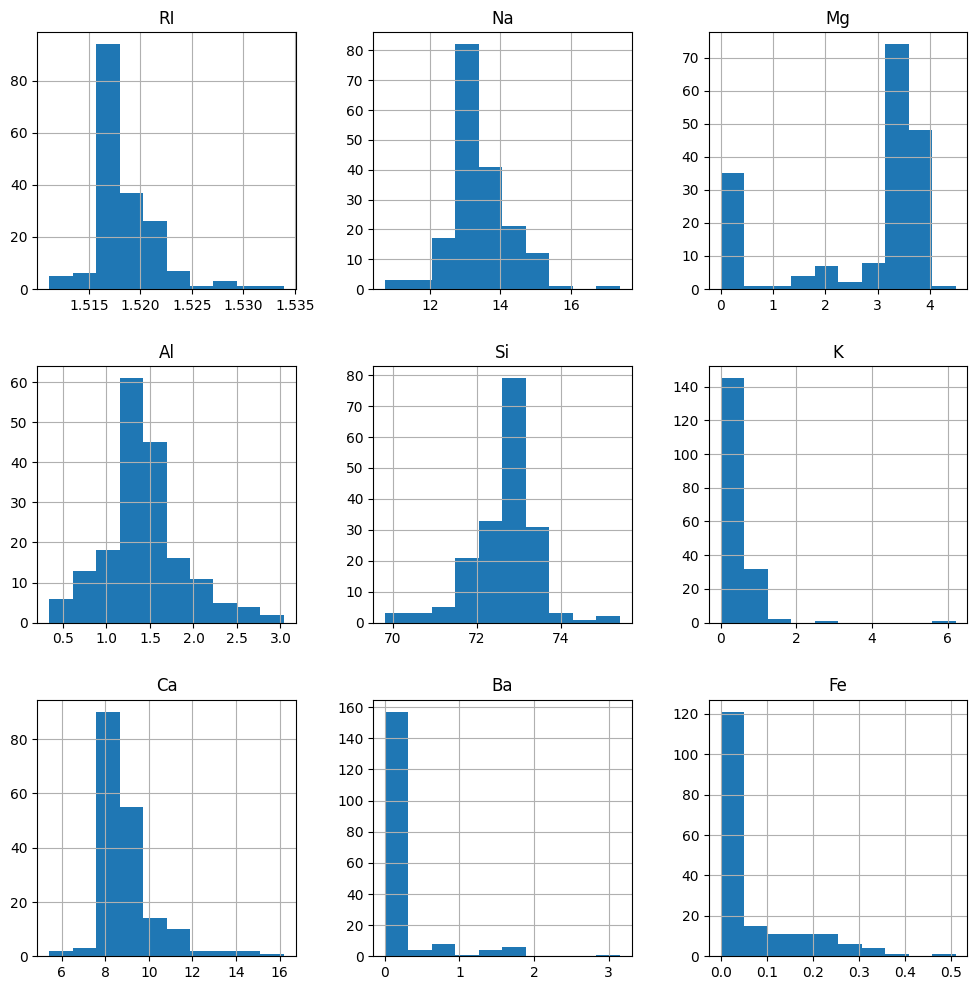

In [59]:
# 3.6 Perform univariate analysis - Histograms
df_train.hist(figsize=(12,12))
plt.show()

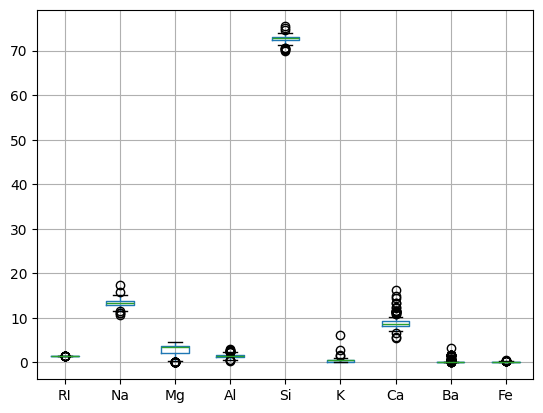

In [60]:
# 3.7 Perform univariate analysis - Boxplot
df_train.boxplot()
plt.show()

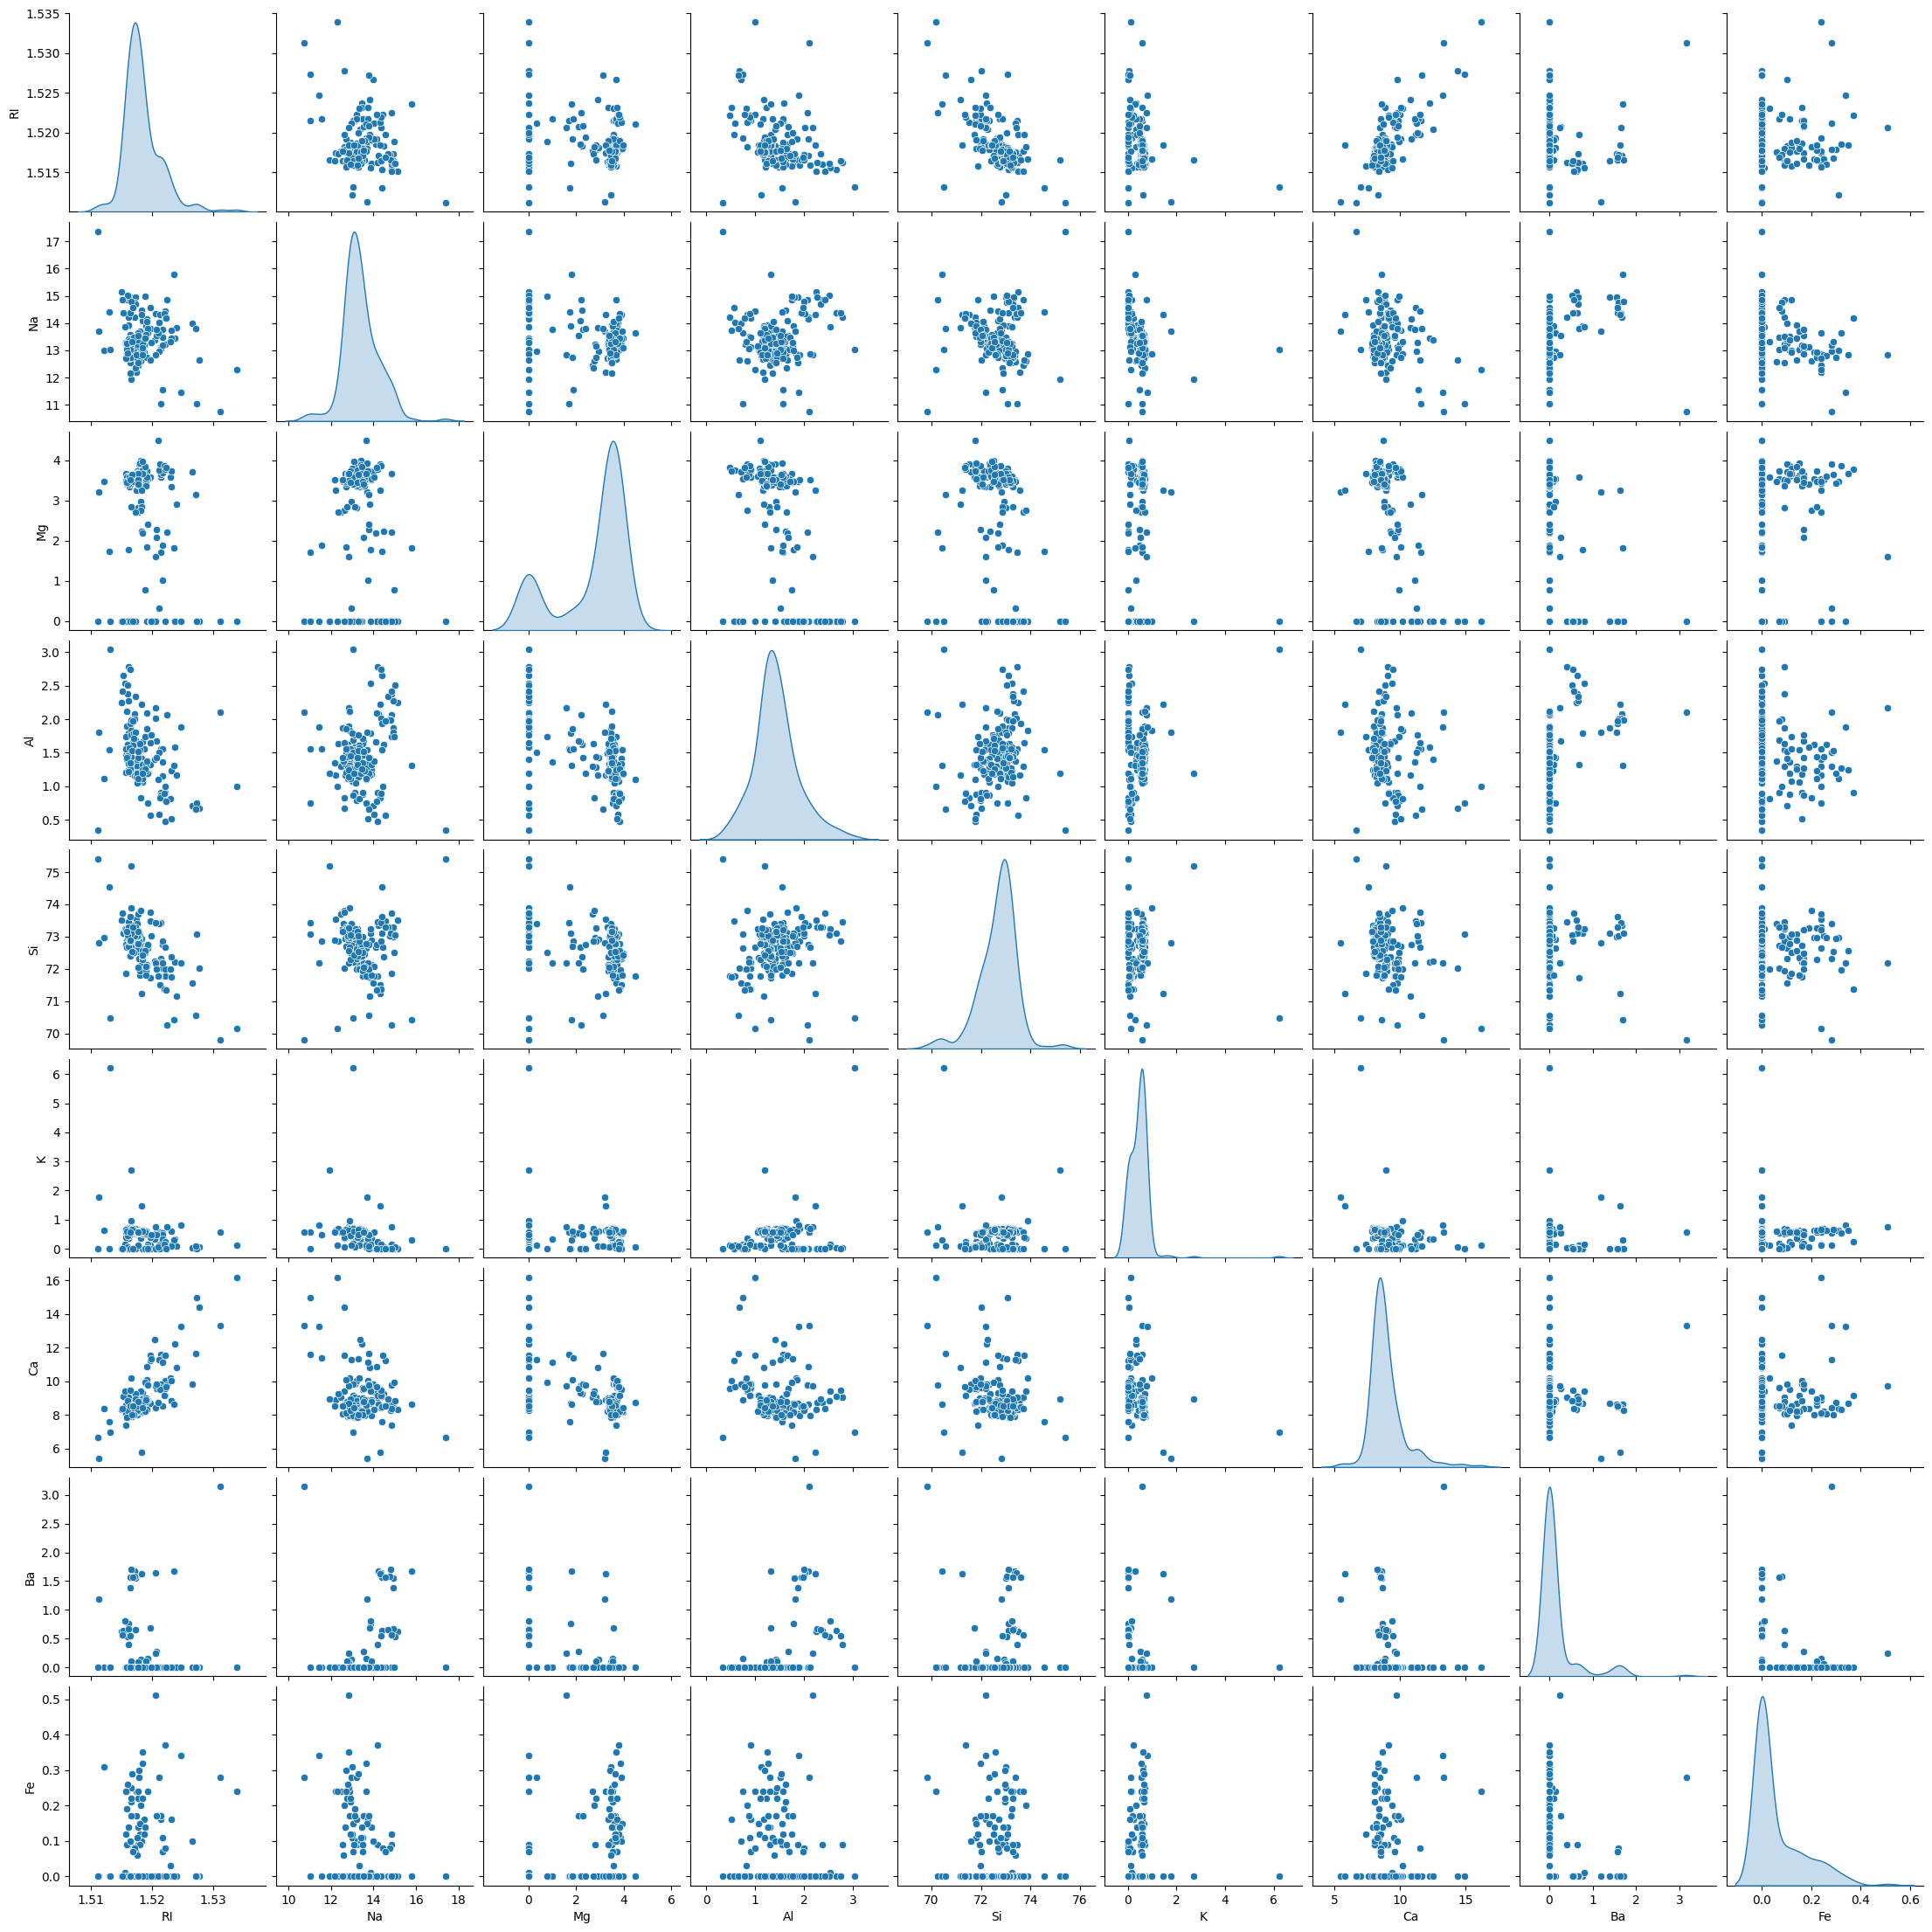

In [61]:
# 3.8 Perform bivariate analysis - Histograms per class
sns.pairplot(df_train, diag_kind='kde')
plt.show()

In [62]:
# 3.9 Analyze correlation
df_train.drop('target', axis=1).corr().style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.181360,-0.119995,-0.378588,-0.638997,-0.261848,0.809337,0.047666,0.144067
Na,-0.181360,1.000000,-0.292702,0.143762,-0.043118,-0.340035,-0.262054,0.307208,-0.244724
Mg,-0.119995,-0.292702,1.000000,-0.514606,-0.198830,0.092077,-0.466204,-0.508849,0.082793
Al,-0.378588,0.143762,-0.514606,1.000000,0.134228,0.217841,-0.187896,0.455612,-0.069375
Si,-0.638997,-0.043118,-0.198830,0.134228,1.000000,-0.081625,-0.308365,-0.072920,-0.112762
K,-0.261848,-0.340035,0.092077,0.217841,-0.081625,1.000000,-0.282928,-0.135980,0.015719
Ca,0.809337,-0.262054,-0.466204,-0.187896,-0.308365,-0.282928,1.000000,-0.025007,0.121119
Ba,0.047666,0.307208,-0.508849,0.455612,-0.072920,-0.135980,-0.025007,1.000000,-0.034817
Fe,0.144067,-0.244724,0.082793,-0.069375,-0.112762,0.015719,0.121119,-0.034817,1.000000


In [63]:
# 4. Create the deep learning model
# 4.1 Split your training dataset into training and validation sets
y_int = y.astype(int)
X_base, X_test, y_base, y_test = train_test_split(X.values, y_int.values, test_size=0.1, random_state=42, stratify=y_int)
X_train, X_val, y_train, y_val = train_test_split(X_base, y_base, test_size=0.1, random_state=42, stratify=y_base)

In [64]:
# 4.2 Standardize numerical values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [65]:
# 4.3 Convert to tensors and then to data tensor
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_val_tensor = torch.FloatTensor(X_val_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)
y_val_tensor = torch.LongTensor(y_val)
y_test_tensor = torch.LongTensor(y_test)
data_train = TensorDataset(X_train_tensor, y_train_tensor)
data_val = TensorDataset(X_val_tensor, y_val_tensor)
data_test = TensorDataset(X_test_tensor, y_test_tensor)

In [66]:
# 4.4 Create data loader
train_loader = DataLoader(data_train, batch_size=10, shuffle=True)
val_loader = DataLoader(data_val, batch_size=1)
test_loader = DataLoader(data_test, batch_size=1)

In [67]:
# 4.4 Define your model architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 6)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [68]:
# 4.5 Define the model, optimizer and criterion
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [69]:
# 4.6 Create the training loop
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()